Bharat Intern

Name : Sayali M Thakre

Task 3 : Number Recognition

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

Fetching MNIST dataset

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Plotting the image

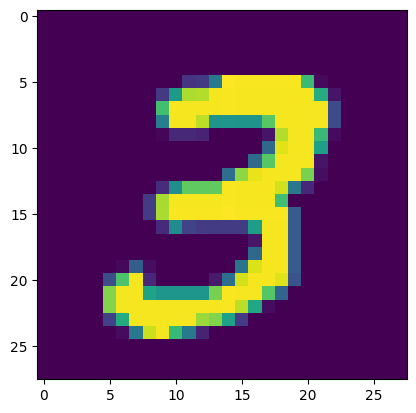

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[7])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


Training the model

In [ ]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2916 - accuracy: 0.9152 - val_loss: 0.1491 - val_accuracy: 0.9578
Epoch 2/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1208 - accuracy: 0.9639 - val_loss: 0.1136 - val_accuracy: 0.9654
Epoch 3/25
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0810 - accuracy: 0.9755 - val_loss: 0.0970 - val_accuracy: 0.9720
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0601 - accuracy: 0.9816 - val_loss: 0.0989 - val_accuracy: 0.9722
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0482 - accuracy: 0.9847 - val_loss: 0.1079 - val_accuracy: 0.9689
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0386 - accuracy: 0.9876 - val_loss: 0.0916 - val_accuracy: 0.9745
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0983 - val_accurac

In [ ]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred = y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9755

Plotting the Training loss and Validation loss

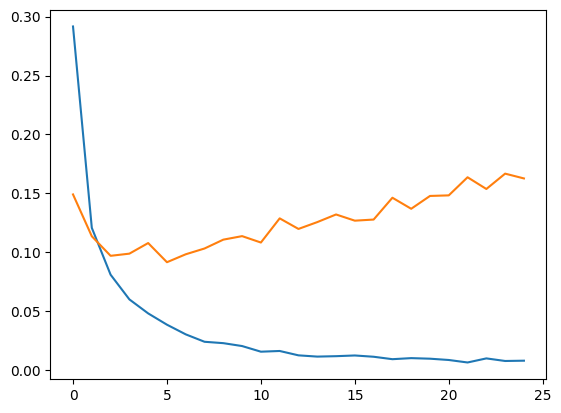

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


Plotting the accuracy

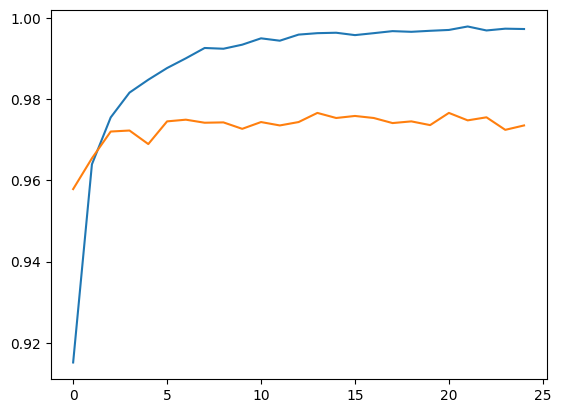

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

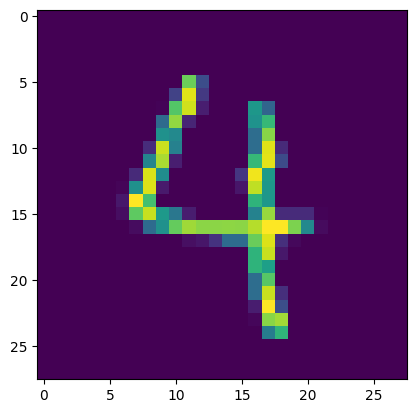

In [ ]:
plt.imshow(X_test[24])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([2])